## 1. Introduction

### 1.1 Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Exploratory data analysis
- Data Pre-Processing and feature engineering
- Model Training
- Choose best model

### 1.3 Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 1.4 Data Collection
- Dataset Source - https://www.kaggle.com/datasets/blastchar/telco-customer-churn


- Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

- The raw data contains 7043 rows (customers) and 21 columns (features).

- The “Churn” column is our target.


### 1.5 Data Content

- Customers who left within the last month – the column is called Churn.


- Services that each customer has signed up for i.e., phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.


- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges.


- Demographic info about customers – gender, age range, and if they have partners and dependents.

### 1.6 About Data

- __customerID:__ Customer ID


- ___Demograhic Information___

- __Gender:__ Whether the customer is a male or a female
- __SeniorCitizen:__ Whether the customer is a senior citizen or not (1, 0)
- __Partner:__ Whether the customer has a partner or not (Yes, No)
- __Dependents:__ Whether the customer has dependents or not (Yes, No)


- ___Service Information___

- __PhoneService:__ Whether the customer has a phone service or not (Yes, No)
- __MultipleLines:__ Whether the customer has multiple lines or not (Yes, No, No phone service)
- __InternetService:__ Customer’s internet service provider (DSL, Fiber optic, No)
- __OnlineSecurity:__ Whether the customer has online security or not (Yes, No, No internet service)
- __OnlineBackup:__ Whether the customer has online backup or not (Yes, No, No internet service)
- __DeviceProtection:__ Whether the customer has device protection or not (Yes, No, No internet service)
- __TechSupport:__ Whether the customer has tech support or not (Yes, No, No internet service)
- __StreamingTV:__ Whether the customer has streaming TV or not (Yes, No, No internet service)
- __StreamingMovies:__ Whether the customer has streaming movies or not (Yes, No, No internet service)


- ___Customer account information___

- __Contract:__ The contract term of the customer (Month-to-month, One year, Two year)
- __PaperlessBilling:__ Whether the customer has paperless billing or not (Yes, No)
- __PaymentMethod:__ The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- __MonthlyCharges:__ The amount charged to the customer monthly
- __TotalCharges:__ The total amount charged to the customer
- __Tenure:__ Number of months the customer has stayed with the company

### 1.7 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

#### Import the CSV Data as Pandas DataFrame

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
"""Import basic modules"""
import math
import os
import gc
import random
import pprint
import numpy as np               # For linear algebra
import pandas as pd              # For data manipulation
import matplotlib.pyplot as plt  # For 2D visualization
import seaborn as sns

# Warning Libraries 
import warnings
warnings.filterwarnings("ignore")
# warnings.simplefilter(action='ignore', category=FutureWarning)

from collections import Counter
from scipy import stats                         # For statistics
from scipy.stats.contingency import association # upgrade scipy to use this to calculate Cramer's V

"""scikit-learn modules"""
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import PowerTransformer # convert to Gaussian-like data
from sklearn.feature_selection import chi2
from sklearn.metrics import matthews_corrcoef

import multiprocessing
import pickle, joblib

In [3]:
# customize as needed
plt_params = {
               'axes.facecolor' : 'white'
                                          }
plt.rcParams.update(plt_params)

In [4]:
# padding value to print left padded string
left_padding = 21

# seed value
SEED = 42

def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(SEED)

#### Import the CSV Data as Pandas DataFrame

In [5]:
df = pd.read_csv('D:\MACHINE LEARNING PROJECT (GITHUB)\Machine-learning-end-to-end-project\customer_data.csv')

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Data summary on a pivot table

In [8]:
from pivottablejs import pivot_ui

pivot_ui(df)

## 2. EXPLORATORY DATA ANALYSIS

In [9]:
def check_df(dataframe, head=5):
    print("######### SHAPE #######")
    print(dataframe.shape)
    
    print("######### DATA TYPES #######")
    print(dataframe.dtypes)
    
    print("######### N/A ##########")
    print(dataframe.isnull().sum())
    
    print("###### QUARTILES ######")
    print(dataframe.quantile([0.25, 0.50, 0.75]).T)
    
    print("##### NUMBER OF UNIQUE VALUES #####")
    print(dataframe.nunique())

In [10]:
check_df(df)

######### SHAPE #######
(7043, 21)
######### DATA TYPES #######
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
######### N/A ##########
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
S

In [11]:
#import sketch
#df2 = df[['Churn','MonthlyCharges','TotalCharges']]

#df2.sketch.howto("plot the distributions of Churn on MonthlyCharges and TotalCharges use cdf and kde= Churn")

In [12]:
#!pip install sketch

* **Insights** 
- TotalCharges and Churn data types need to be converted from __object__ to __float64__ or __int64__.


- The __first quartile (Q1)__ is the value below which 25% of the data points lie. The __second quartile (Q2)__ is the median, or the value below which 50% of the data points lie. The __third quartile (Q3)__ is the value below which 75% of the data points lie.


- In the case of __SeniorCitizen__, all of the data points are equal to 0, so all of the quartiles are also equal to Young Adult.


- In the case of __tenure__, 25% of the data points are below 9 months, 50% of the data points are below 29 months, and 75% of the data points are below 55 months.


- In the case of __MonthlyCharges__, 25% of the data points are below 35.5, 50% of the data points are below 70.35, and 75% of the data points are below 89.85.

In [13]:
# Change total charges type object to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [14]:
# We need 1 and 0 instead of yes and no
df["Churn"] = df["Churn"].apply(lambda x : 1 if x == "Yes" else 0)

In [15]:
df.dropna(inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80
Churn,7032.0,0.265785,0.441782,0.00,0.0000,0.000,1.0000,1.00


In [18]:
# drop customer ID
del df["customerID"]

In [19]:

def get_numerical_columns(df):
    numerical_columns = []
    
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            numerical_columns.append((column, df[column].nunique()))
    
    return numerical_columns

def get_dichotomous_columns(df):
    dichotomous_columns = []
    
    for column in df.columns:
        if df[column].dtype == 'object' and df[column].nunique() == 2:
            dichotomous_columns.append((column, df[column].nunique()))
    
    return dichotomous_columns

def get_polytomous_columns(df):
    polytomous_columns = []
    
    for column in df.columns:
        if df[column].dtype == 'object' and df[column].nunique() > 2:
            polytomous_columns.append((column, df[column].nunique()))
    
    return polytomous_columns


numerical_cols = get_numerical_columns(df)
dichotomous_cols = get_dichotomous_columns(df)
polytomous_cols = get_polytomous_columns(df)

print("Numerical Columns:")
for column, unique_values in numerical_cols:
    print(f"{column}: {unique_values} unique values")
print("=======================================")
print("\nDichotomous Columns:")
for column, unique_values in dichotomous_cols:
    print(f"{column}: {unique_values} unique values")
print("=======================================")
print("\nPolytomous Columns:")
for column, unique_values in polytomous_cols:
    print(f"{column}: {unique_values} unique values")

Numerical Columns:
SeniorCitizen: 2 unique values
tenure: 72 unique values
MonthlyCharges: 1584 unique values
TotalCharges: 6530 unique values
Churn: 2 unique values

Dichotomous Columns:
gender: 2 unique values
Partner: 2 unique values
Dependents: 2 unique values
PhoneService: 2 unique values
PaperlessBilling: 2 unique values

Polytomous Columns:
MultipleLines: 3 unique values
InternetService: 3 unique values
OnlineSecurity: 3 unique values
OnlineBackup: 3 unique values
DeviceProtection: 3 unique values
TechSupport: 3 unique values
StreamingTV: 3 unique values
StreamingMovies: 3 unique values
Contract: 3 unique values
PaymentMethod: 4 unique values


In [20]:
# !pip install lux

In [21]:
# autocleaning library  https://www.youtube.com/shorts/nMFALSb3Yl4

In [22]:
# Create a new DataFrame
#new_df = pd.concat([df[numerical_cols], df[dichotomous_cols], df[polytomous_cols]], axis=1)
## deployment needs: Streamlit is a good choice for prototyping and experimentation
# Print the results

In [23]:
import lux
df.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [24]:
import lux
df.intent = ["Churn"]
df.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

### 2.1 **Univariate Analysis**

* **EDA of Numerical Variables**

In [25]:
def num_summary(dataframe, numerical_columns, plot=False):
    quantiles = [0.25, 0.50, 0.75]
    print(dataframe[numerical_columns].describe(quantiles).T)
    
    if plot:
        dataframe[numerical_columns].hist(bins=20)
        plt.xlabel(numerical_columns)
        plt.title(numerical_columns)
        plt.show()

count    7032.000000
mean        0.162400
std         0.368844
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SeniorCitizen, dtype: float64


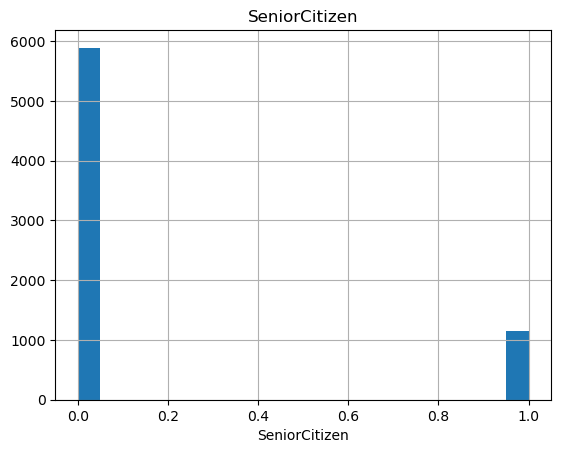

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


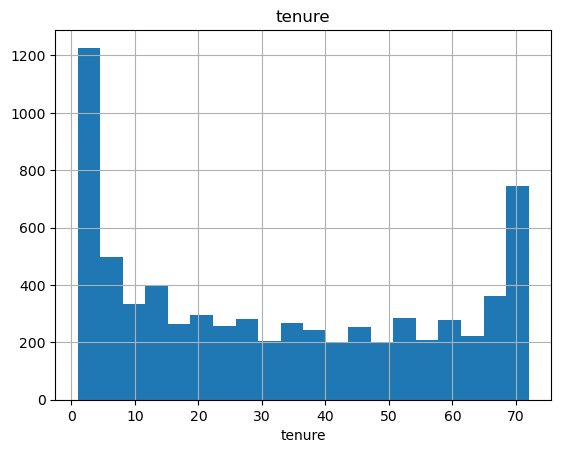

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64


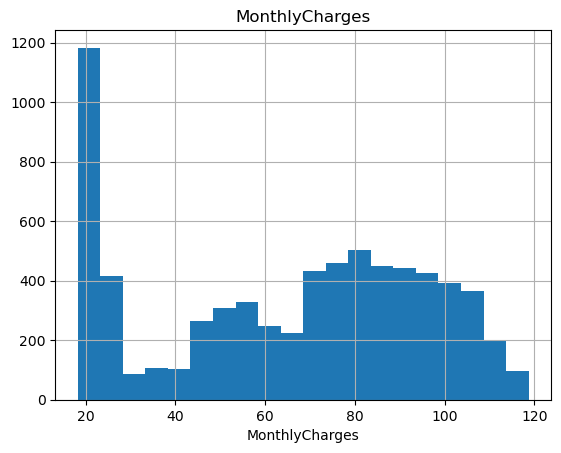

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64


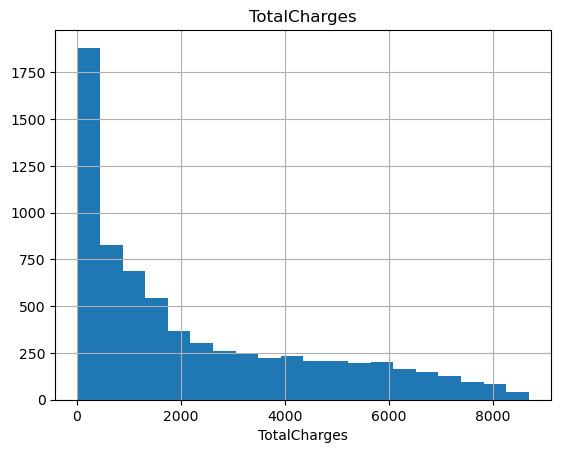

count    7032.000000
mean        0.265785
std         0.441782
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Churn, dtype: float64


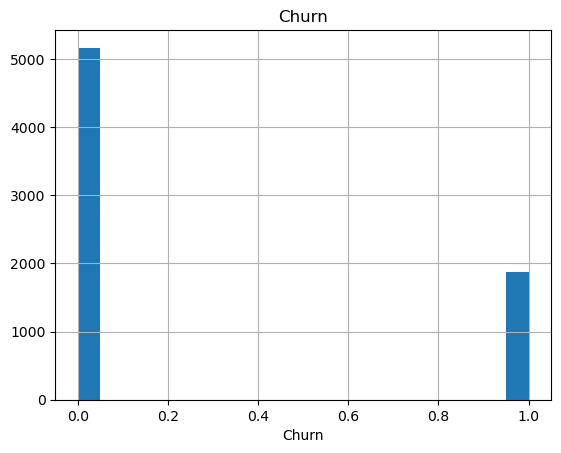

In [26]:
num_cols = [column for column, _ in numerical_cols]  # Extracting column names from numerical_cols

for col in num_cols:
    num_summary(df, col, plot=True)

**Insights**

* **Senior Citizen** - Most customers are youth adults.

* **Tenure** - Below ten years and above sixty years are important segments 

* **Monthly Charges** - 20 and 80 per month are important monthly charges to analyse for churn.

* **Total Charges** - Below 2000 total charges need to be thoroughly explored for churn.

#### **Target Variable Analysis**

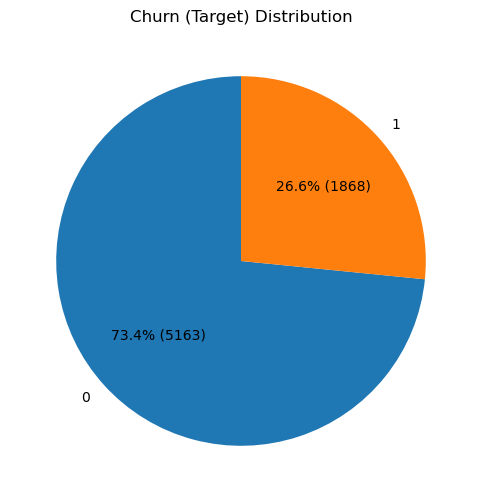

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [27]:
# Convert DataFrame to seaborn-compatible format
data = df['Churn'].value_counts().reset_index().rename(columns={'index':'Type'})

# Plot the pie chart using Matplotlib
plt.figure(figsize=(8, 6))
plt.pie(x=data['Churn'], labels=data['Type'], autopct=lambda pct: f"{pct:.1f}% ({int(pct/100*sum(data['Churn']))})", startangle=90)
plt.title('Churn (Target) Distribution')
plt.show()

print('===================================================')

sns.countplot(data = df, x = "Churn")

### 2.2 Numerical variables according to the target variable

In [ ]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

In [ ]:
for col in num_cols:
    target_summary_with_num(df, "Churn", col)

       SeniorCitizen
Churn               
0           0.128995
1           0.254682


          tenure
Churn           
0      37.650010
1      17.979133


       MonthlyCharges
Churn                
0           61.307408
1           74.441332


       TotalCharges
Churn              
0       2555.344141
1       1531.796094


       Churn
Churn       
0        0.0
1        1.0




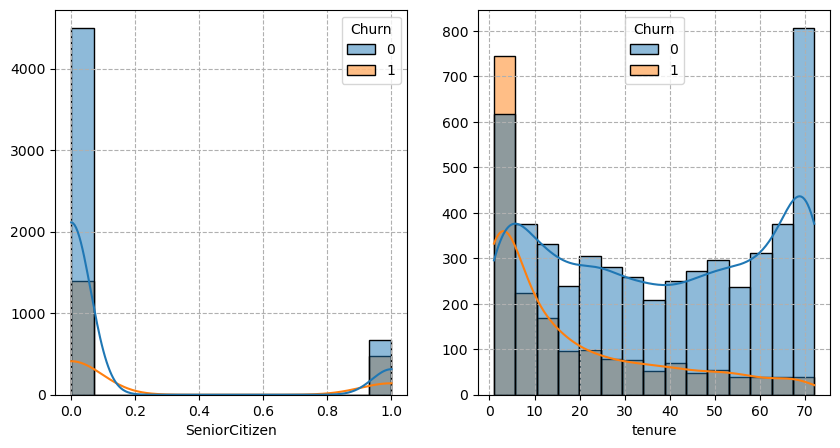

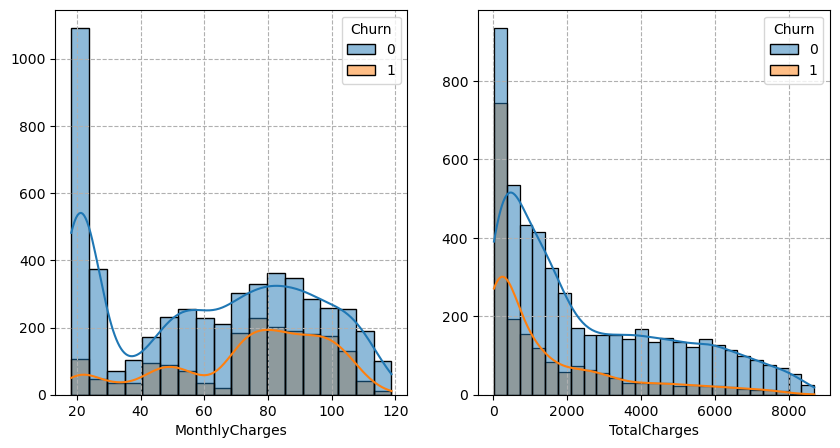

In [ ]:
for i in range(0, len(num_cols)-1, 2):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    sns.histplot(df, x=num_cols[i], hue="Churn", kde=True, ax=ax[0])
    
    if i+1 < len(num_cols):
        sns.histplot(df, x=num_cols[i+1], hue="Churn", kde=True, ax=ax[1])

    for ax in ax:
        ax.grid(True, which='both', linestyle='--')
        ax.set(ylabel='')

Text(0.5, 1.0, 'Monthly charges by churn')

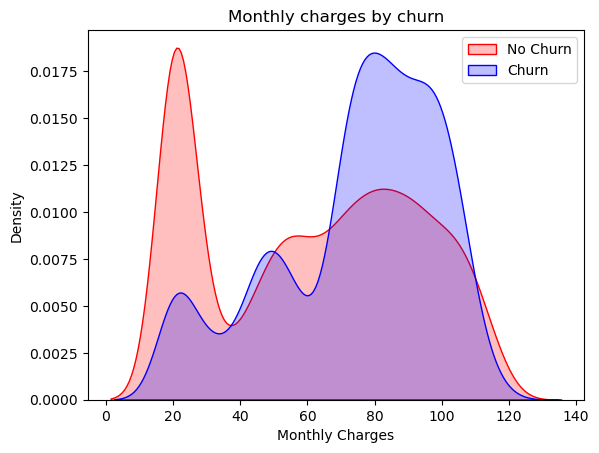

In [ ]:
Mth = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 0)], color="Red", shade=True)
Mth = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 1)], ax=Mth, color="Blue", shade=True)
Mth.legend(["No Churn", "Churn"], loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

Text(0.5, 1.0, 'Total charges by churn')

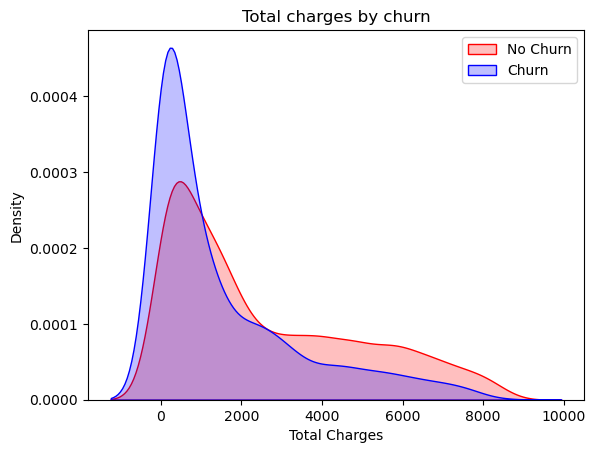

In [ ]:
Tot = sns.kdeplot(df.TotalCharges[(df["Churn"] == 0)], color="Red", shade=True)
Tot = sns.kdeplot(df.TotalCharges[(df["Churn"] == 1)], ax=Tot, color="Blue", shade=True)
Tot.legend(["No Churn", "Churn"], loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

Text(0.5, 1.0, 'Senior Citizen by churn')

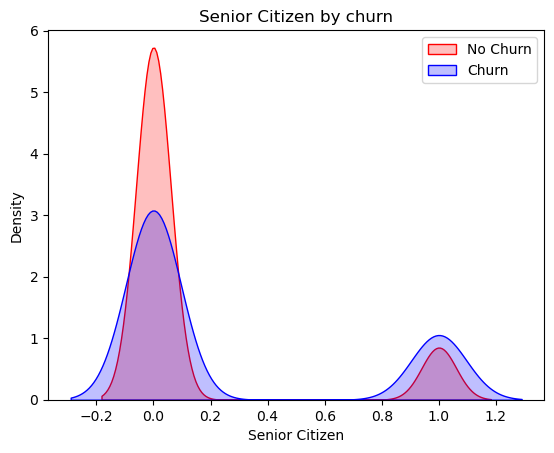

In [ ]:
Tot = sns.kdeplot(df.SeniorCitizen[(df["Churn"] == 0)], color="Red", shade=True)
Tot = sns.kdeplot(df.SeniorCitizen[(df["Churn"] == 1)], ax=Tot, color="Blue", shade=True)
Tot.legend(["No Churn", "Churn"], loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Senior Citizen')
Tot.set_title('Senior Citizen by churn')

Text(0.5, 1.0, 'Tenure by churn')

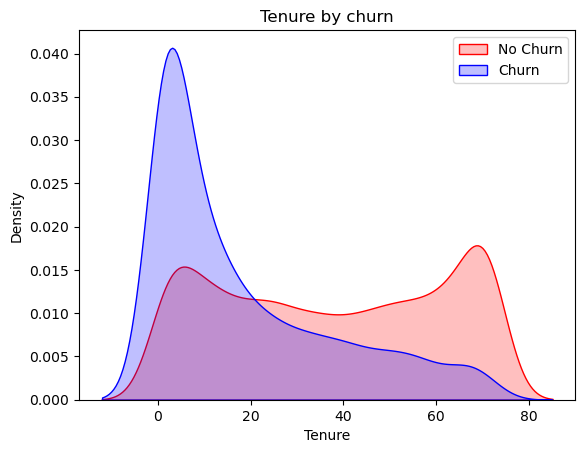

In [ ]:
Tot = sns.kdeplot(df.tenure[(df["Churn"] == 0)], color="Red", shade=True)
Tot = sns.kdeplot(df.tenure[(df["Churn"] == 1)], ax=Tot, color="Blue", shade=True)
Tot.legend(["No Churn", "Churn"], loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Tenure')
Tot.set_title('Tenure by churn')

### 2.3 EDA of Dichotomous Variables

### 2.3.1 Count of dichotomous variables

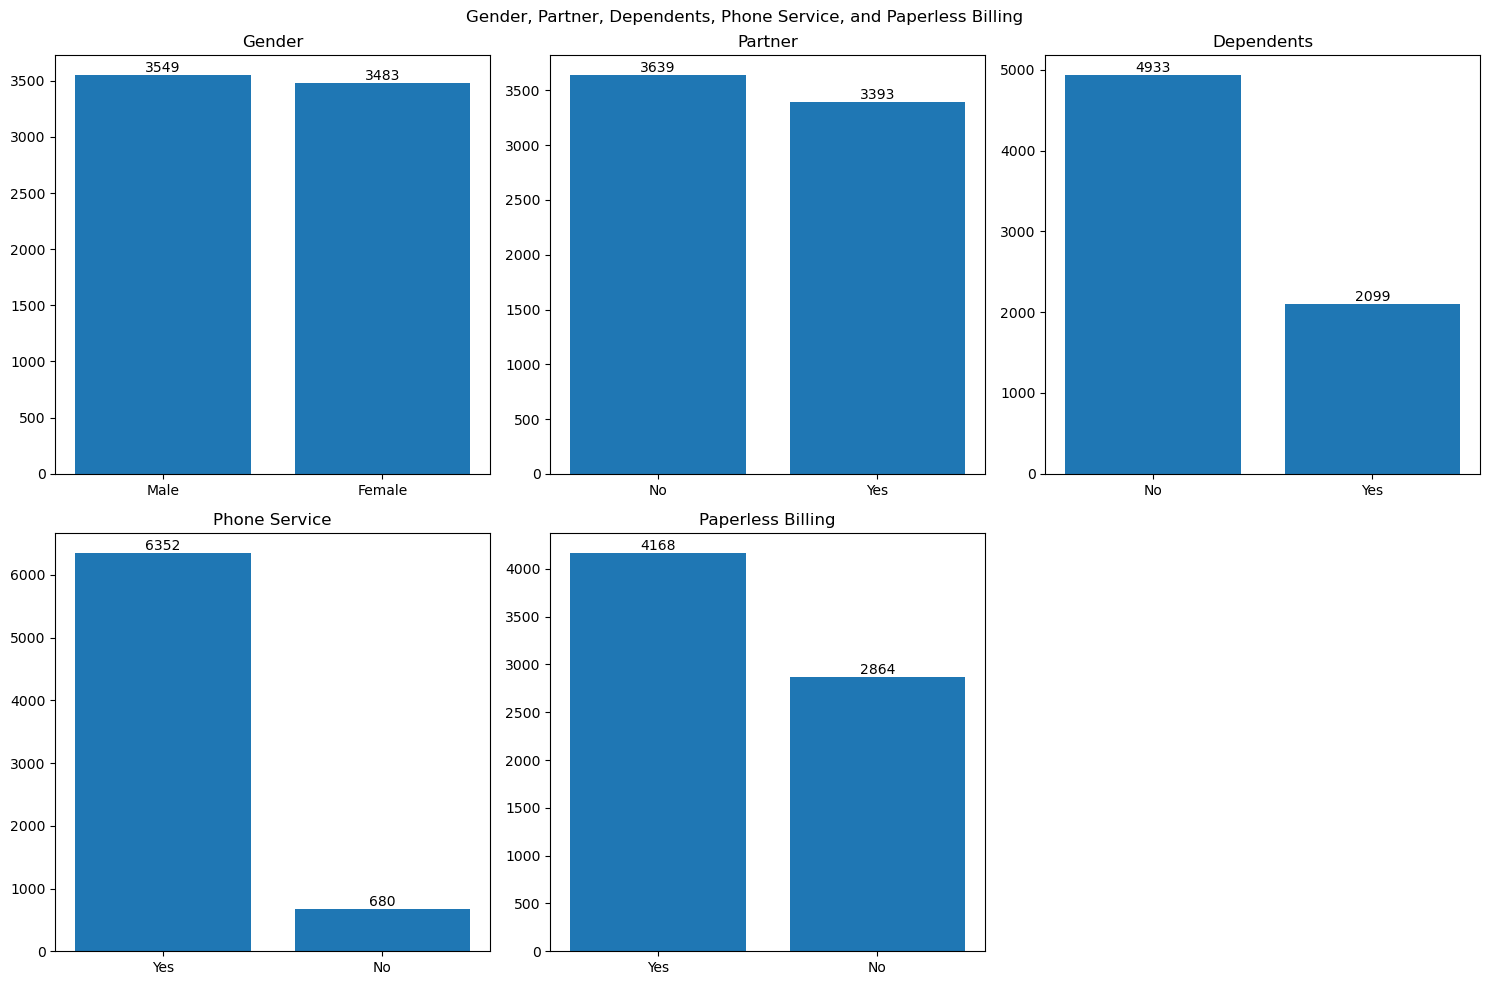

In [ ]:
import matplotlib.pyplot as plt

# Calculate the value counts for each category
gender_counts = df['gender'].value_counts()
partner_counts = df['Partner'].value_counts()
dependents_counts = df['Dependents'].value_counts()
phone_service_counts = df['PhoneService'].value_counts()
paperless_billing_counts = df['PaperlessBilling'].value_counts()

# Create subplots with a 2x3 grid
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plot the bar chart for Gender
axs[0, 0].bar(gender_counts.index, gender_counts.values)
axs[0, 0].set_title('Gender')

# Add numbers on top of the bars
for i, count in enumerate(gender_counts.values):
    axs[0, 0].text(i, count, str(count), ha='center', va='bottom')

# Plot the bar chart for Partner
axs[0, 1].bar(partner_counts.index, partner_counts.values)
axs[0, 1].set_title('Partner')

# Add numbers on top of the bars
for i, count in enumerate(partner_counts.values):
    axs[0, 1].text(i, count, str(count), ha='center', va='bottom')

# Plot the bar chart for Dependents
axs[0, 2].bar(dependents_counts.index, dependents_counts.values)
axs[0, 2].set_title('Dependents')

# Add numbers on top of the bars
for i, count in enumerate(dependents_counts.values):
    axs[0, 2].text(i, count, str(count), ha='center', va='bottom')

# Plot the bar chart for Phone Service
axs[1, 0].bar(phone_service_counts.index, phone_service_counts.values)
axs[1, 0].set_title('Phone Service')

# Add numbers on top of the bars
for i, count in enumerate(phone_service_counts.values):
    axs[1, 0].text(i, count, str(count), ha='center', va='bottom')

# Plot the bar chart for Paperless Billing
axs[1, 1].bar(paperless_billing_counts.index, paperless_billing_counts.values)
axs[1, 1].set_title('Paperless Billing')

# Add numbers on top of the bars
for i, count in enumerate(paperless_billing_counts.values):
    axs[1, 1].text(i, count, str(count), ha='center', va='bottom')

# Hide the empty subplot
axs[1, 2].axis('off')

# Add a super title
fig.suptitle('Gender, Partner, Dependents, Phone Service, and Paperless Billing')

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

### 2.3.2 Dichotomous variables according to the target variable

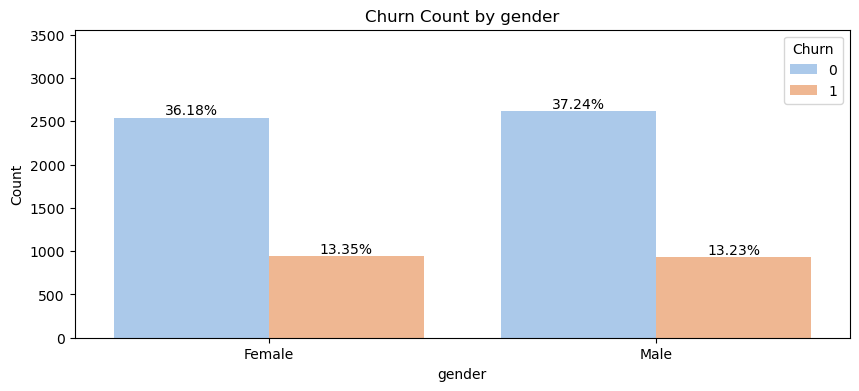

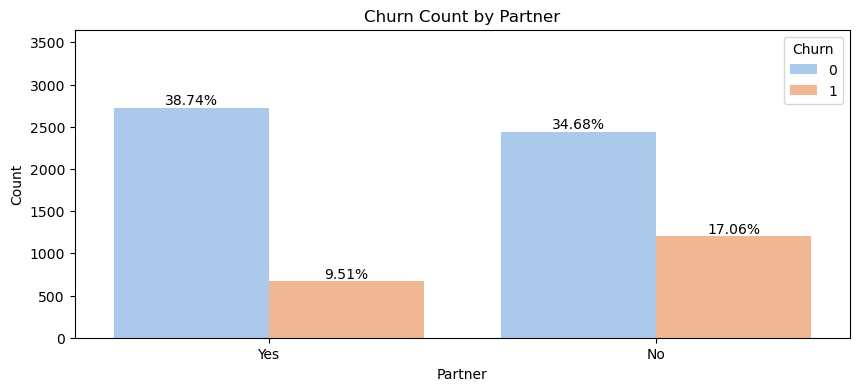

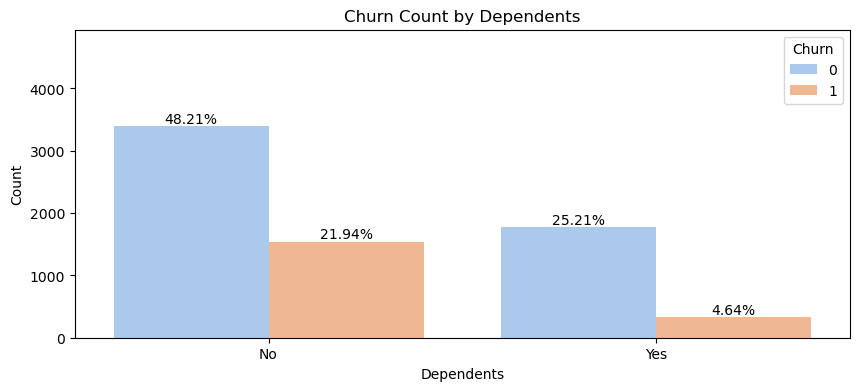

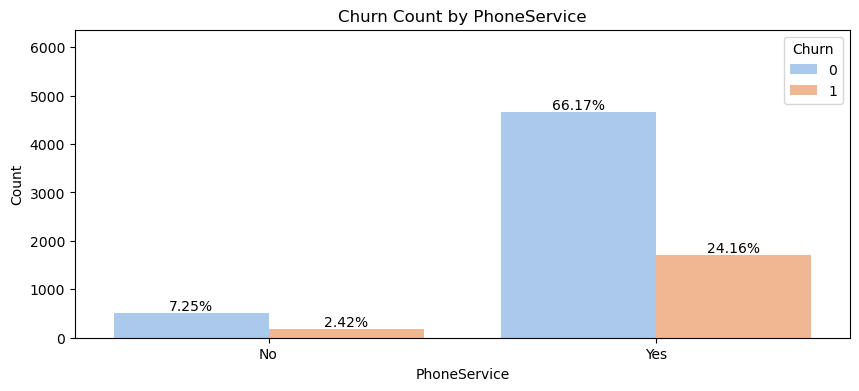

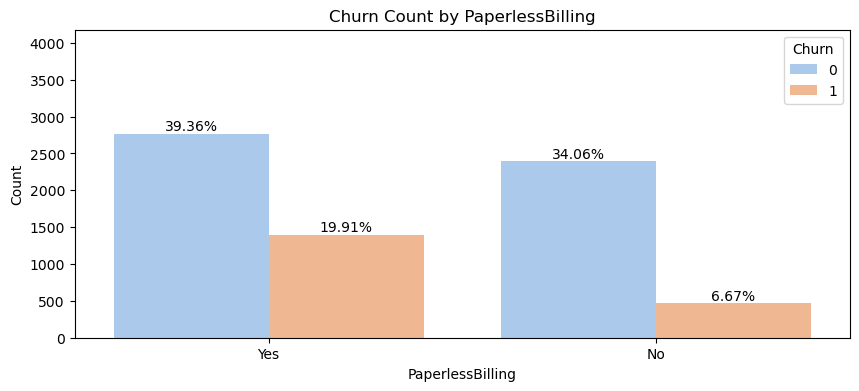

In [ ]:
# Plotting bar charts
variables = ['gender','Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

for var in variables:
    plt.figure(figsize=(10, 4))
    ax = sns.countplot(x=var, hue='Churn', data=df, palette='pastel')
    ax.set_xlabel(var)
    ax.set_ylabel('Count')
    ax.set_title(f'Churn Count by {var}')
    ax.legend(title='Churn', loc='best')
    ax.set_ylim(0, df[var].value_counts().max() + 10)

    # Add percentage labels
    total = len(df)
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height/total:.2%}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom')

    plt.show()

### 2.3.3 Count of Polytomous  variables

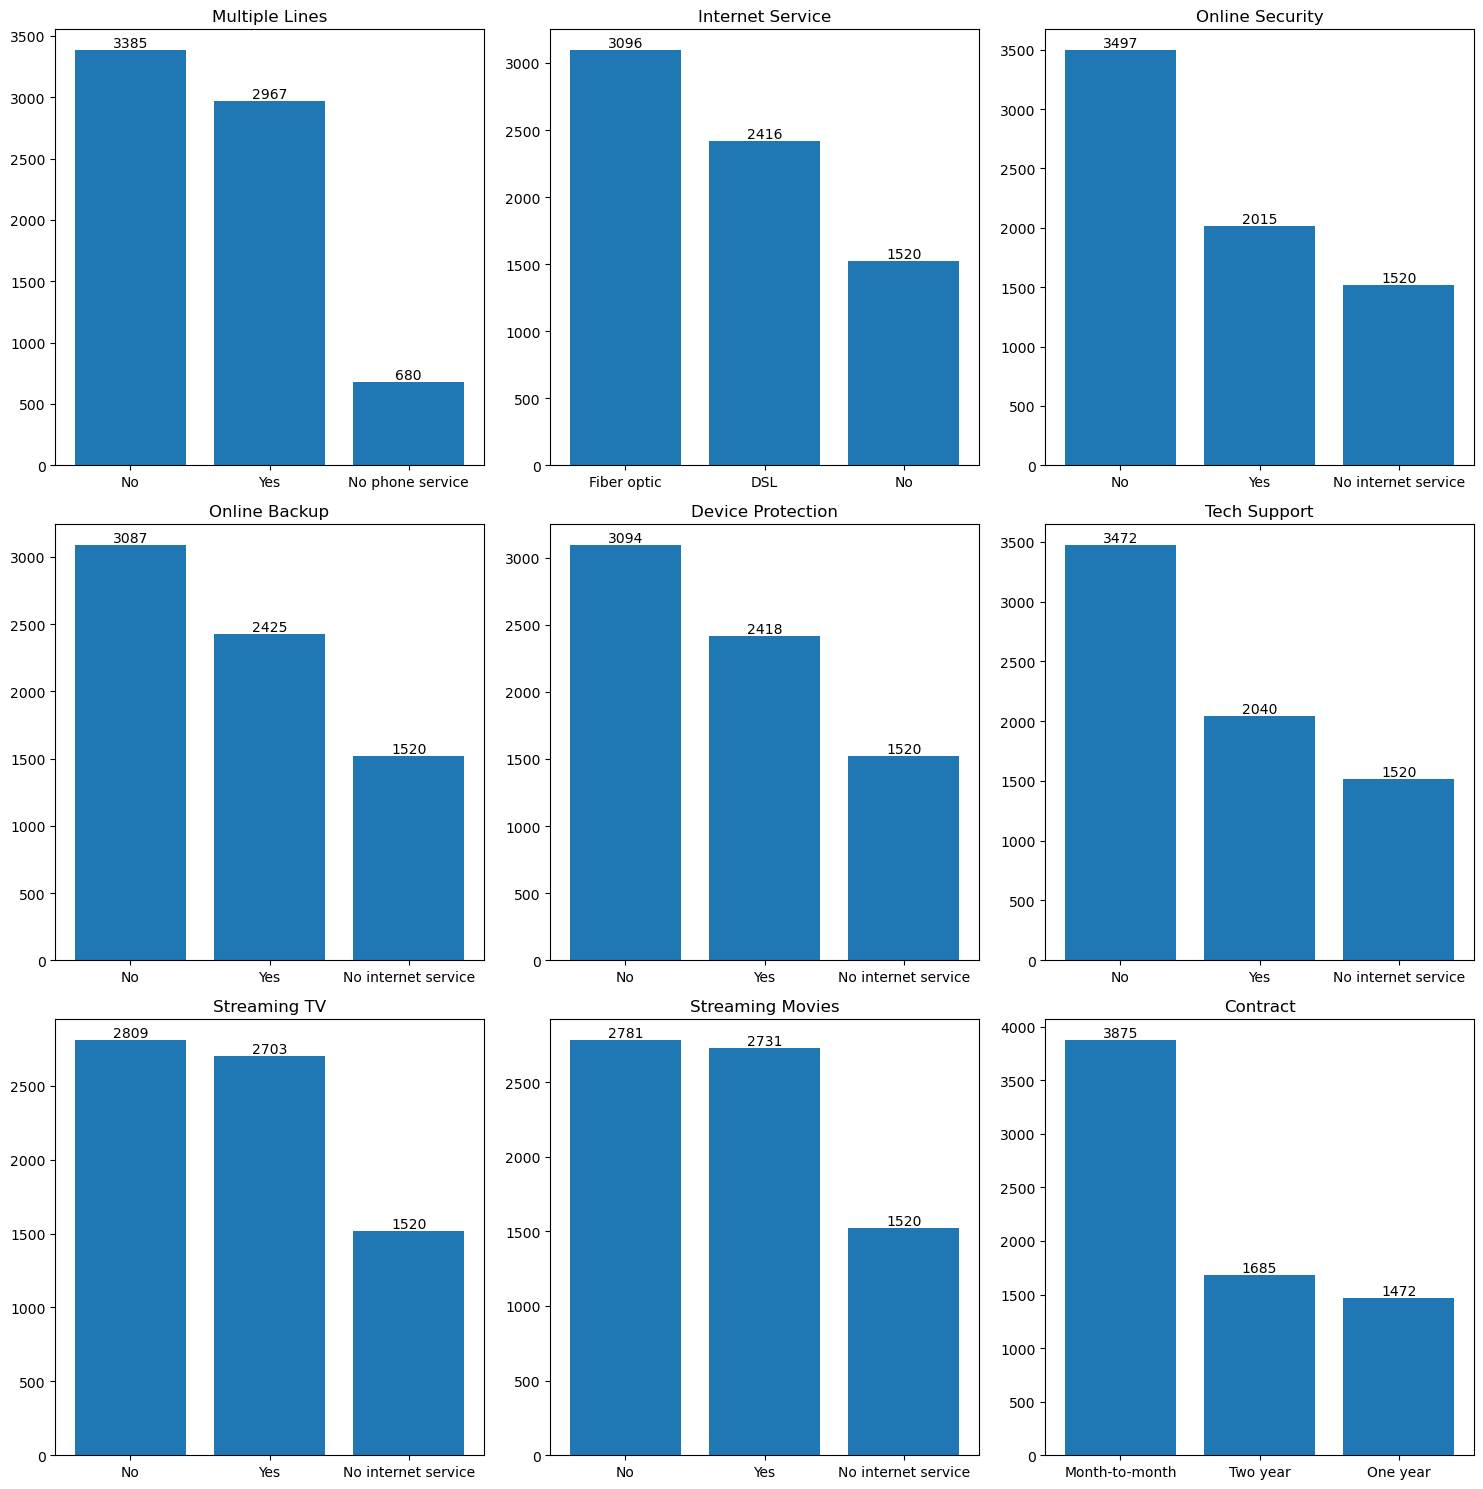

In [ ]:
import matplotlib.pyplot as plt

# Calculate the value counts for each category
multiple_lines_counts = df['MultipleLines'].value_counts()
internet_service_counts = df['InternetService'].value_counts()
online_security_counts = df['OnlineSecurity'].value_counts()
online_backup_counts = df['OnlineBackup'].value_counts()
device_protection_counts = df['DeviceProtection'].value_counts()
tech_support_counts = df['TechSupport'].value_counts()
streaming_tv_counts = df['StreamingTV'].value_counts()
streaming_movies_counts = df['StreamingMovies'].value_counts()
contract_counts = df['Contract'].value_counts()
payment_method_counts = df['PaymentMethod'].value_counts()

# Create subplots with a 3x3 grid
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Plot the bar chart for Multiple Lines
axs[0, 0].bar(multiple_lines_counts.index, multiple_lines_counts.values)
axs[0, 0].set_title('Multiple Lines')

# Add numbers on top of the bars
for i, count in enumerate(multiple_lines_counts.values):
    axs[0, 0].text(i, count, str(count), ha='center', va='bottom')

# Plot the bar chart for Internet Service
axs[0, 1].bar(internet_service_counts.index, internet_service_counts.values)
axs[0, 1].set_title('Internet Service')

# Add numbers on top of the bars
for i, count in enumerate(internet_service_counts.values):
    axs[0, 1].text(i, count, str(count), ha='center', va='bottom')

# Plot the bar chart for Online Security
axs[0, 2].bar(online_security_counts.index, online_security_counts.values)
axs[0, 2].set_title('Online Security')

# Add numbers on top of the bars
for i, count in enumerate(online_security_counts.values):
    axs[0, 2].text(i, count, str(count), ha='center', va='bottom')

# Plot the bar chart for Online Backup
axs[1, 0].bar(online_backup_counts.index, online_backup_counts.values)
axs[1, 0].set_title('Online Backup')

# Add numbers on top of the bars
for i, count in enumerate(online_backup_counts.values):
    axs[1, 0].text(i, count, str(count), ha='center', va='bottom')

# Plot the bar chart for Device Protection
axs[1, 1].bar(device_protection_counts.index, device_protection_counts.values)
axs[1, 1].set_title('Device Protection')

# Add numbers on top of the bars
for i, count in enumerate(device_protection_counts.values):
    axs[1, 1].text(i, count, str(count), ha='center', va='bottom')

# Plot the bar chart for Tech Support
axs[1, 2].bar(tech_support_counts.index, tech_support_counts.values)
axs[1, 2].set_title('Tech Support')

# Add numbers on top of the bars
for i, count in enumerate(tech_support_counts.values):
    axs[1, 2].text(i, count, str(count), ha='center', va='bottom')

# Plot the bar chart for Streaming TV
axs[2, 0].bar(streaming_tv_counts.index, streaming_tv_counts.values)
axs[2, 0].set_title('Streaming TV')

# Add numbers on top of the bars
for i, count in enumerate(streaming_tv_counts.values):
    axs[2, 0].text(i, count, str(count), ha='center', va='bottom')

# Plot the bar chart for Streaming Movies
axs[2, 1].bar(streaming_movies_counts.index, streaming_movies_counts.values)
axs[2, 1].set_title('Streaming Movies')

# Add numbers on top of the bars
for i, count in enumerate(streaming_movies_counts.values):
    axs[2, 1].text(i, count, str(count), ha='center', va='bottom')

# Plot the bar chart for Contract
axs[2, 2].bar(contract_counts.index, contract_counts.values)
axs[2, 2].set_title('Contract')

# Add numbers on top of the bars
for i, count in enumerate(contract_counts.values):
    axs[2, 2].text(i, count, str(count), ha='center', va='bottom')

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()



### 2.3.4 Dichotomous variables according to the target variable

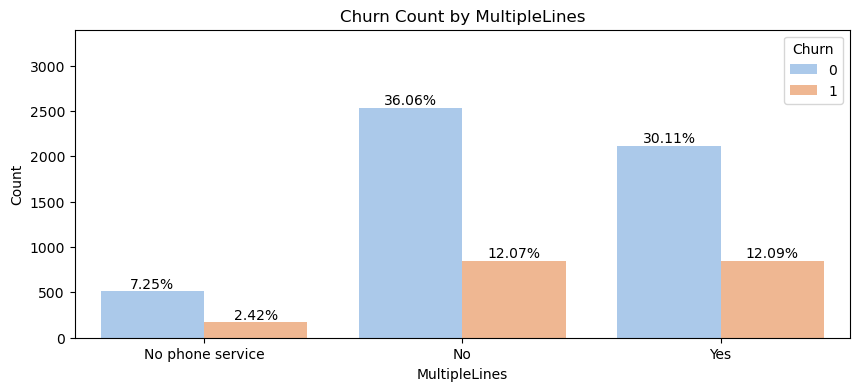

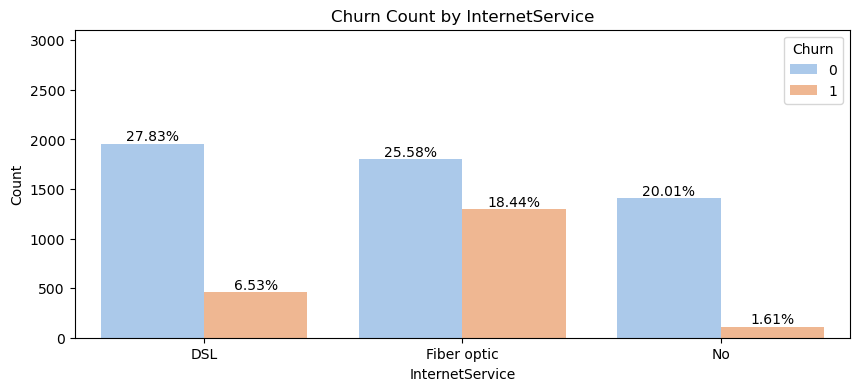

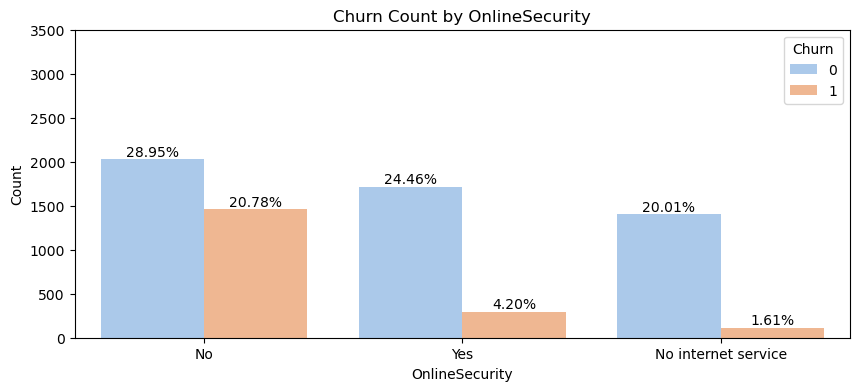

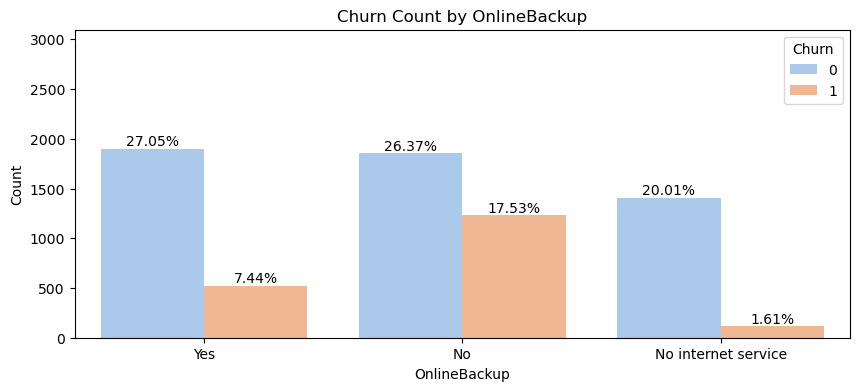

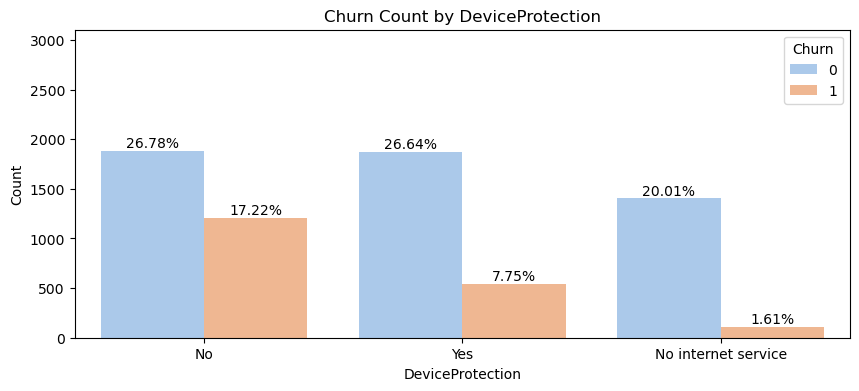

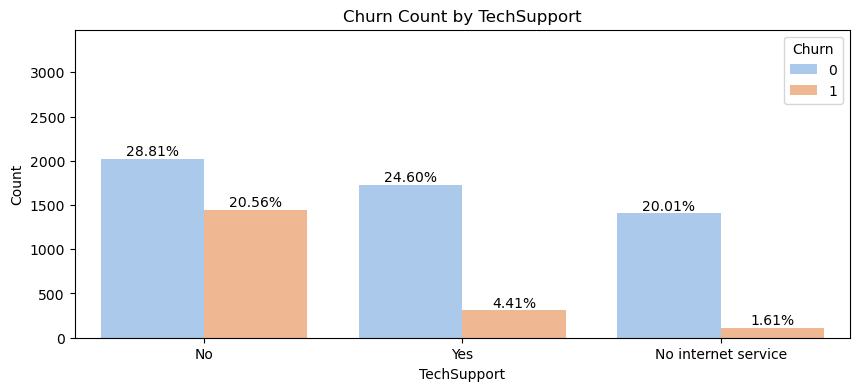

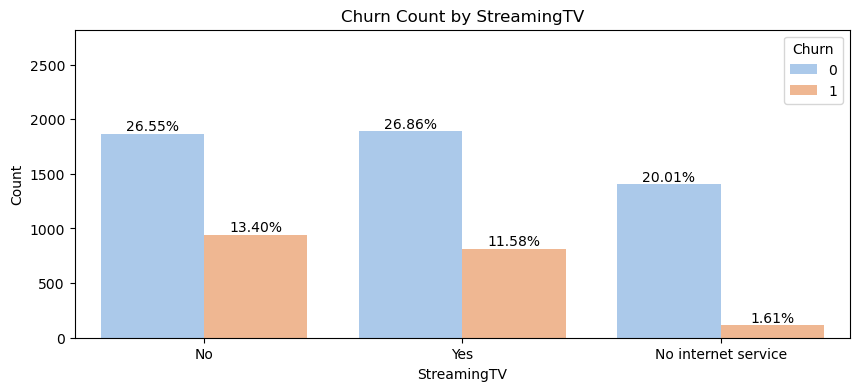

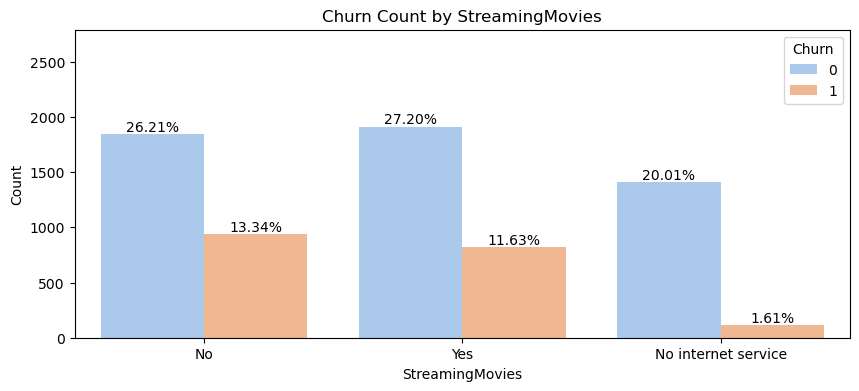

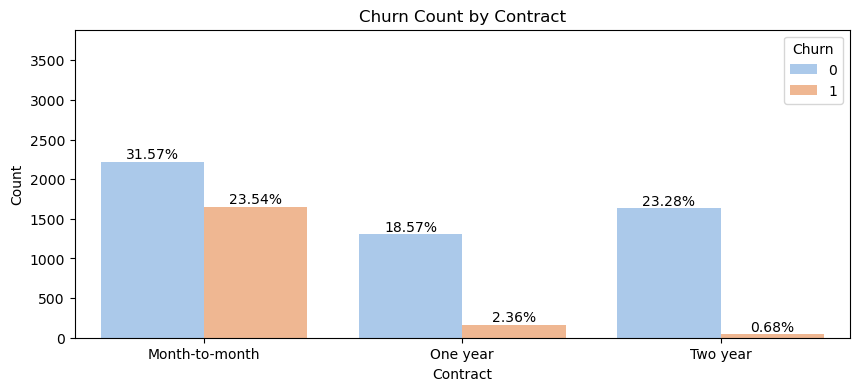

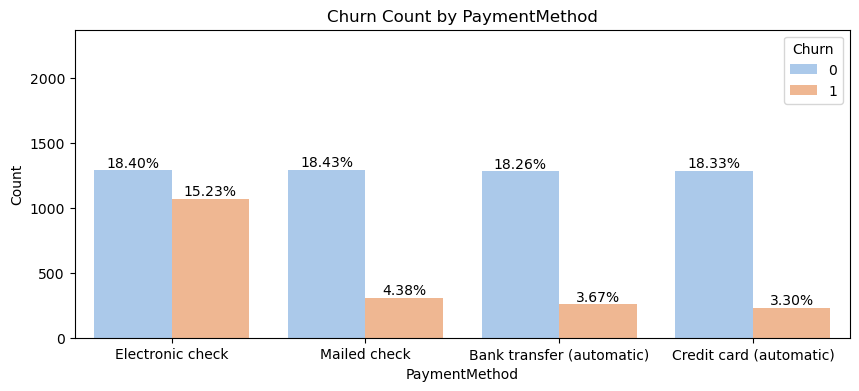

In [ ]:
# Plotting bar charts
variables = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']

for var in variables:
    plt.figure(figsize=(10, 4))
    ax = sns.countplot(x=var, hue='Churn', data=df, palette='pastel')
    ax.set_xlabel(var)
    ax.set_ylabel('Count')
    ax.set_title(f'Churn Count by {var}')
    ax.legend(title='Churn', loc='best')
    ax.set_ylim(0, df[var].value_counts().max() + 10)

    # Add percentage labels
    total = len(df)
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height/total:.2%}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom')

    plt.show()

### 2.3.4' Counts of polytomous variables according to the target variable

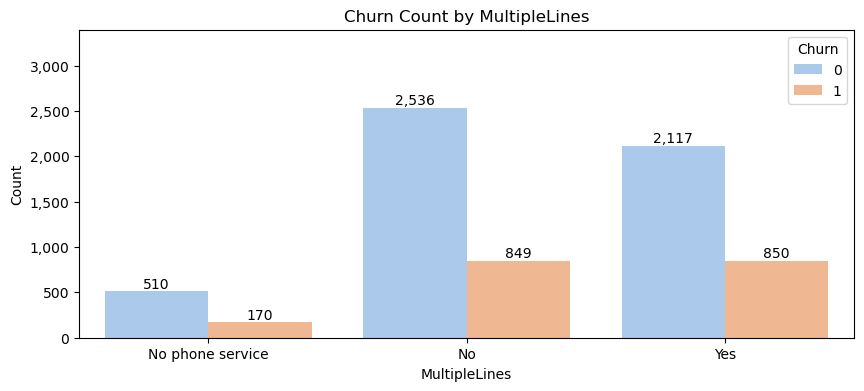

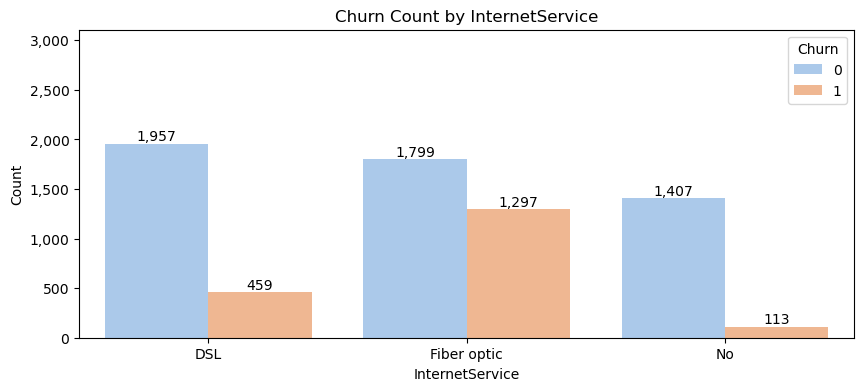

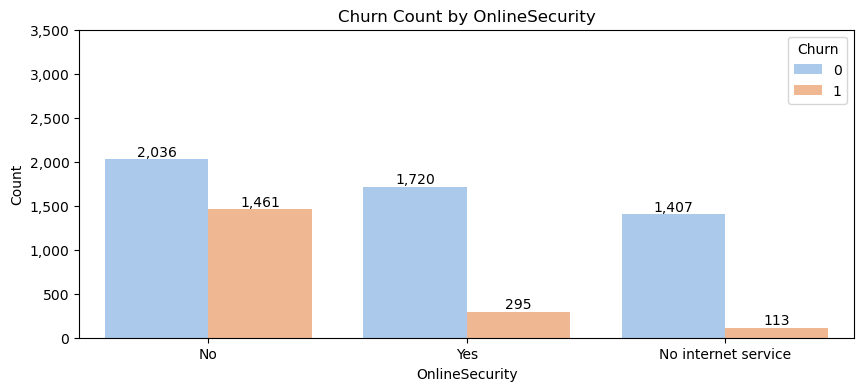

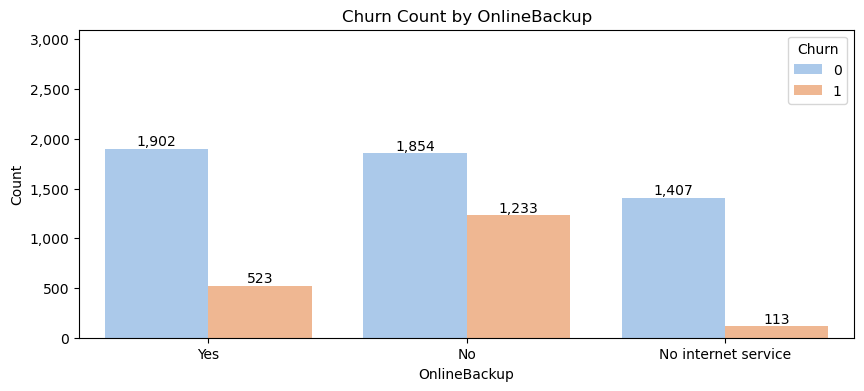

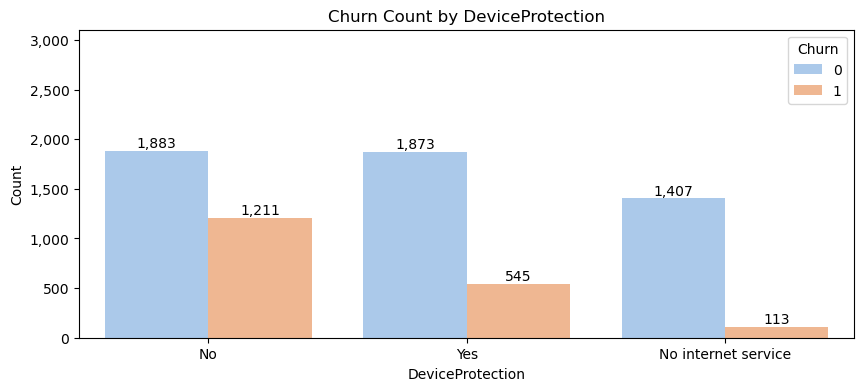

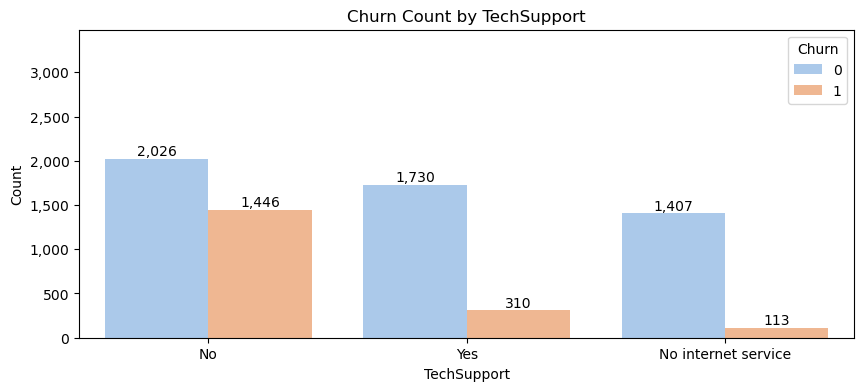

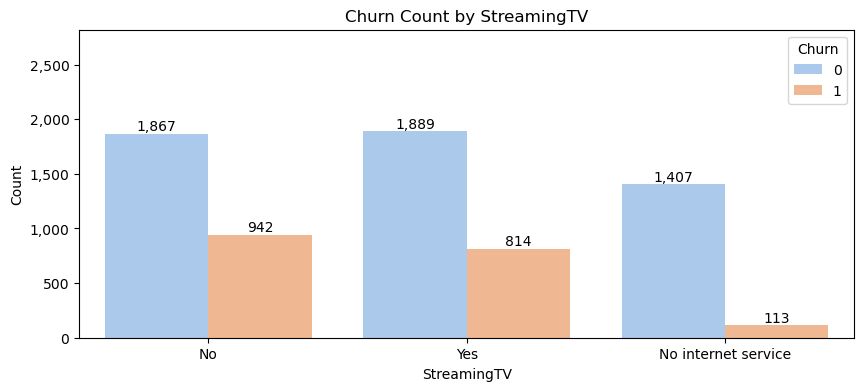

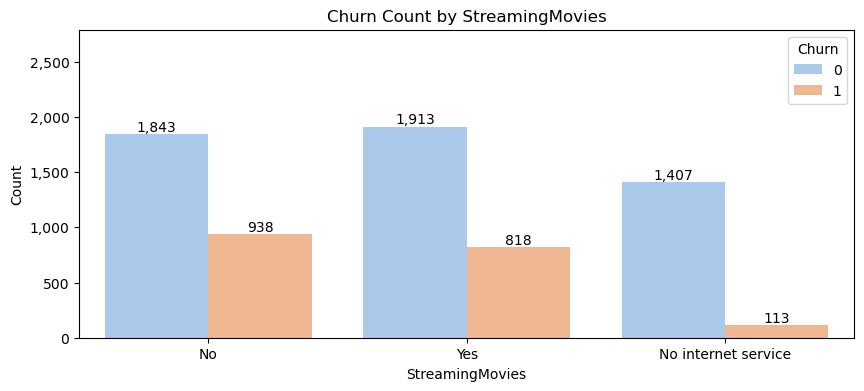

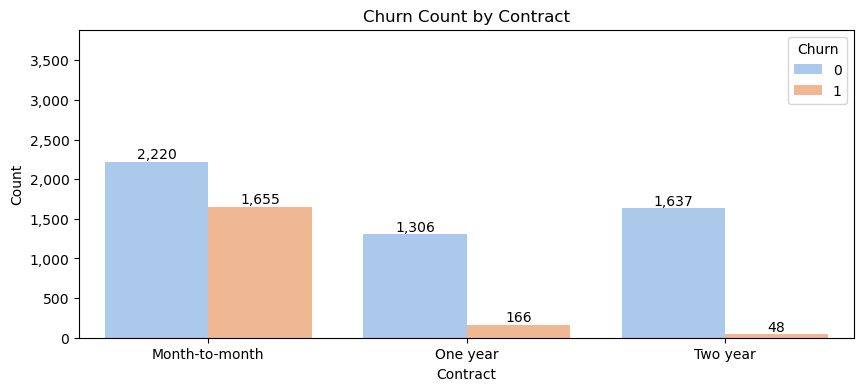

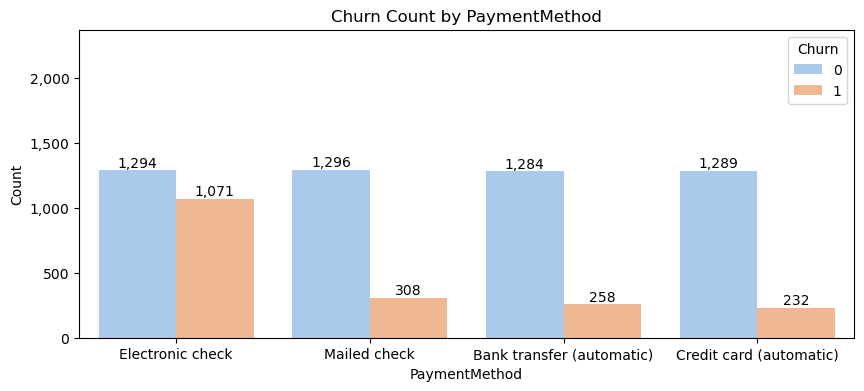

In [ ]:
import matplotlib.ticker as mticker

# Plotting bar charts
variables = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']

for var in variables:
    plt.figure(figsize=(10, 4))
    ax = sns.countplot(x=var, hue='Churn', data=df, palette='pastel')
    ax.set_xlabel(var)
    ax.set_ylabel('Count')
    ax.set_title(f'Churn Count by {var}')
    ax.legend(title='Churn', loc='best')
    ax.set_ylim(0, df[var].value_counts().max() + 10)

    # Format count labels
    def format_label(x, _):
        return f'{x:,.0f}'

    ax.yaxis.set_major_formatter(mticker.FuncFormatter(format_label))

    # Add count labels
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(format_label(height, None), (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom')

    plt.show()

### 2.3 EDA of Categorical Variables


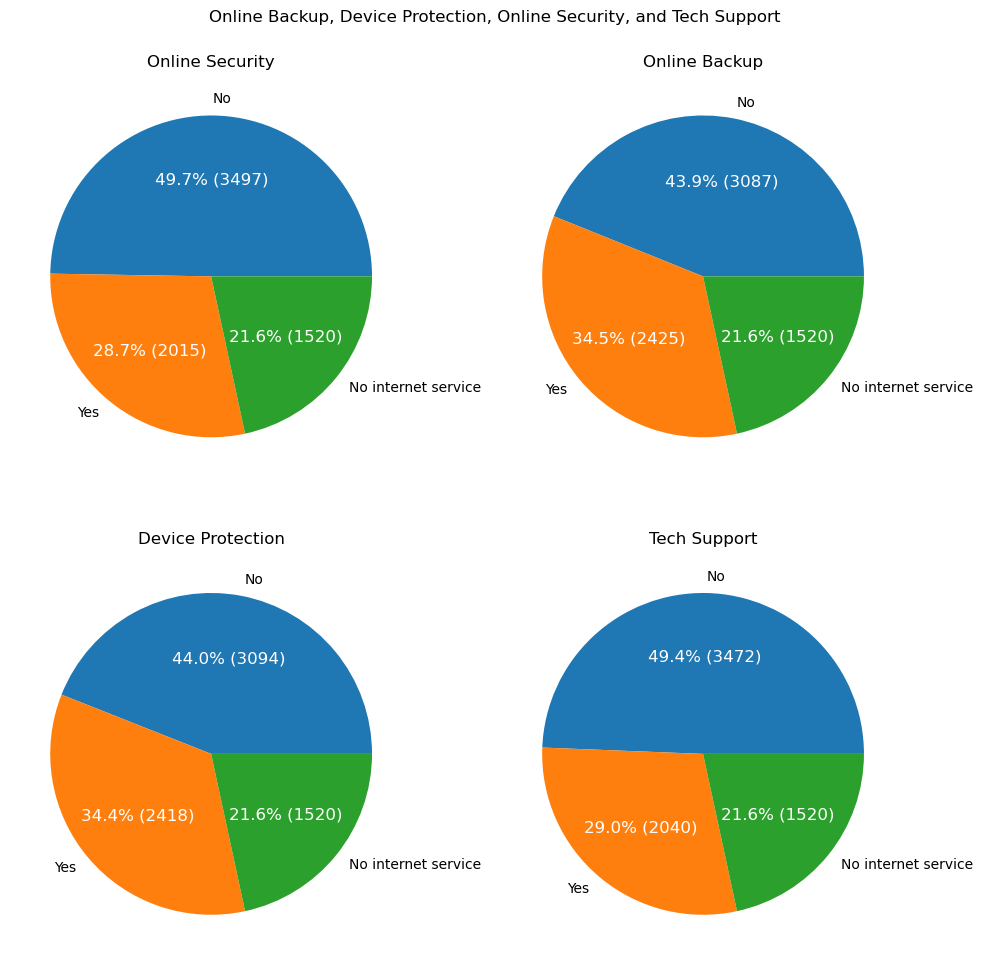

In [ ]:
import matplotlib.pyplot as plt

# Calculate the value counts for each category
online_security_counts = df['OnlineSecurity'].value_counts()
online_backup_counts = df['OnlineBackup'].value_counts()
device_protection_counts = df['DeviceProtection'].value_counts()
tech_support_counts = df['TechSupport'].value_counts()

# Create subplots with a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Plot the pie chart for Online Security
_, _, autotexts = axs[0, 0].pie(online_security_counts, labels=online_security_counts.index, autopct='%1.1f%%')
axs[0, 0].set_title('Online Security')

# Add numbers next to percentages
for autotext, count in zip(autotexts, online_security_counts):
    autotext.set_color('white')
    autotext.set_fontsize(12)
    autotext.set_text(f"{autotext.get_text()} ({count})")

# Plot the pie chart for Online Backup
_, _, autotexts = axs[0, 1].pie(online_backup_counts, labels=online_backup_counts.index, autopct='%1.1f%%')
axs[0, 1].set_title('Online Backup')

# Add numbers next to percentages
for autotext, count in zip(autotexts, online_backup_counts):
    autotext.set_color('white')
    autotext.set_fontsize(12)
    autotext.set_text(f"{autotext.get_text()} ({count})")

# Plot the pie chart for Device Protection
_, _, autotexts = axs[1, 0].pie(device_protection_counts, labels=device_protection_counts.index, autopct='%1.1f%%')
axs[1, 0].set_title('Device Protection')

# Add numbers next to percentages
for autotext, count in zip(autotexts, device_protection_counts):
    autotext.set_color('white')
    autotext.set_fontsize(12)
    autotext.set_text(f"{autotext.get_text()} ({count})")

# Plot the pie chart for Tech Support
_, _, autotexts = axs[1, 1].pie(tech_support_counts, labels=tech_support_counts.index, autopct='%1.1f%%')
axs[1, 1].set_title('Tech Support')

# Add numbers next to percentages
for autotext, count in zip(autotexts, tech_support_counts):
    autotext.set_color('white')
    autotext.set_fontsize(12)
    autotext.set_text(f"{autotext.get_text()} ({count})")

# Add a super title
fig.suptitle('Online Backup, Device Protection, Online Security, and Tech Support')

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

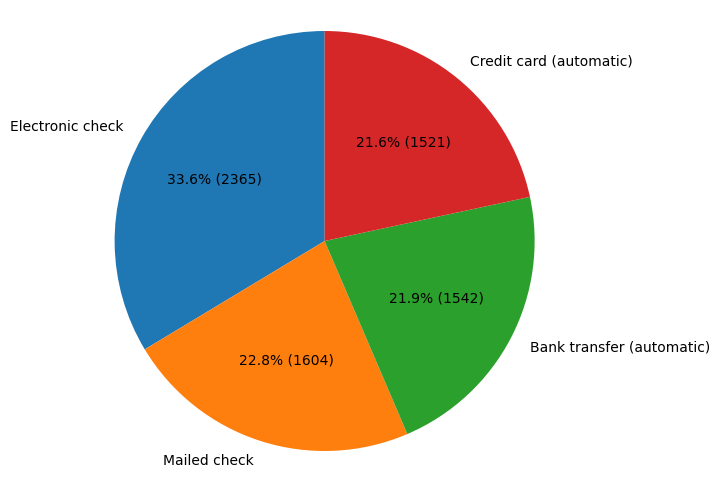

In [ ]:
# Calculate the value counts for each payment method
payment_counts = df['PaymentMethod'].value_counts().reset_index().rename(columns={'index':'Type', 'PaymentMethod': 'Count'})

# Plot the pie chart using matplotlib
plt.figure(figsize=(8, 6))
patches, texts, autotexts = plt.pie(payment_counts['Count'], labels=payment_counts['Type'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
#plt.title()

# Add numbers next to percentages
for i, autotext in enumerate(autotexts):
    autotext.set_text(f"{autotext.get_text()} ({payment_counts['Count'].iloc[i]})")

# Display the Markdown heading and the pie chart
plt.show()

### 2.4 Checking Outliers

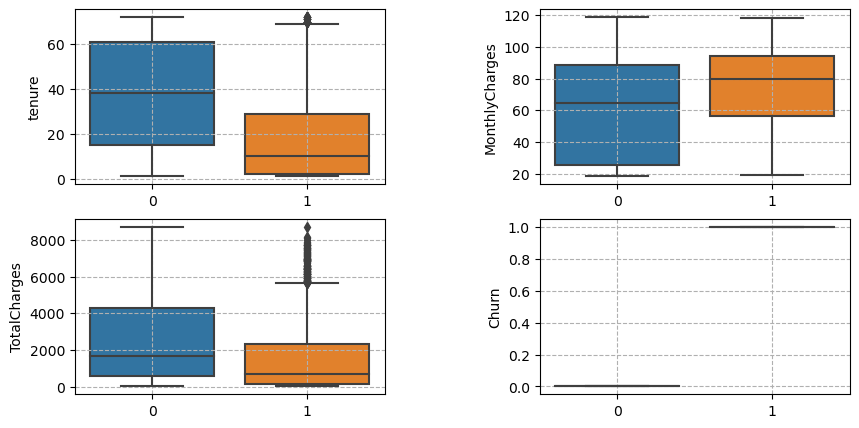

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2, 2, figsize=(10, 5))

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

for i in range(0, len(num_cols)-1, 2):
    sns.boxplot(data=df, y=num_cols[i], x="Churn", ax=ax[i//2][0])
    sns.boxplot(data=df, y=num_cols[i + 1], x="Churn", ax=ax[i//2][1])

for axis in ax.flat:
    axis.grid(True, which='both', linestyle='--')
    axis.set(xlabel='')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.5)  # Increase or decrease the value as needed

# Show the plot
plt.show()


### Total Charges for many users are in extreme level in Mailed Check payment method

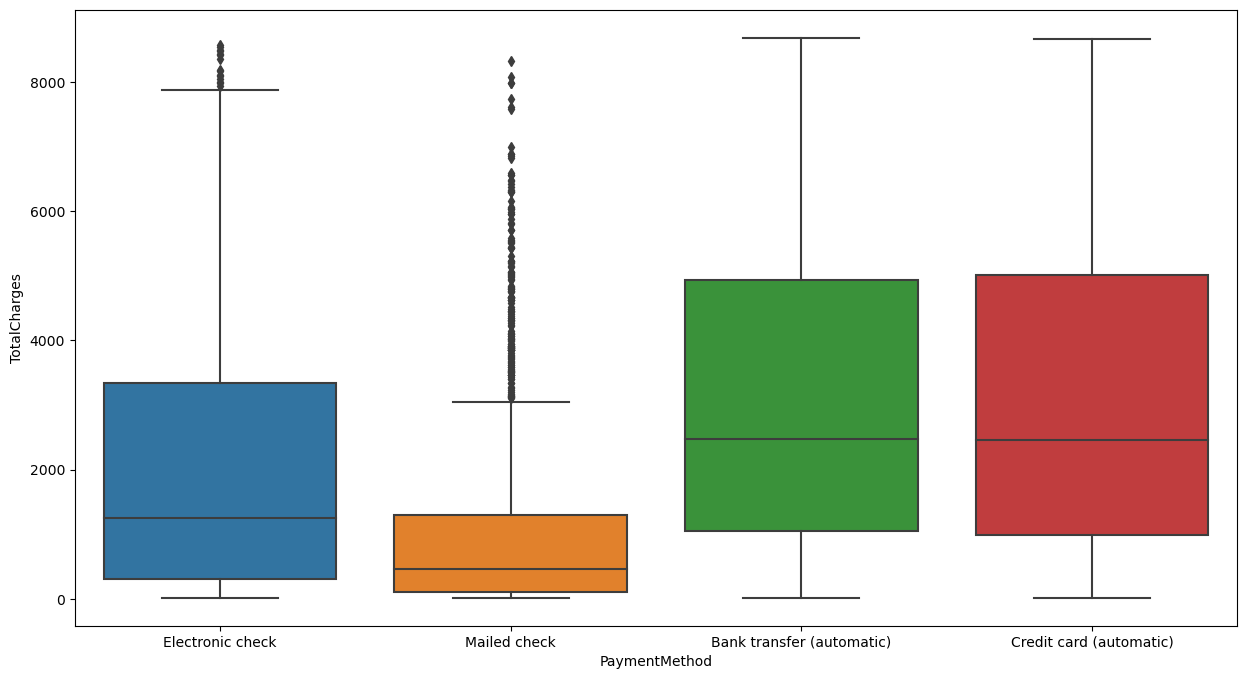

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="PaymentMethod", y="TotalCharges", data=df)
plt.show()


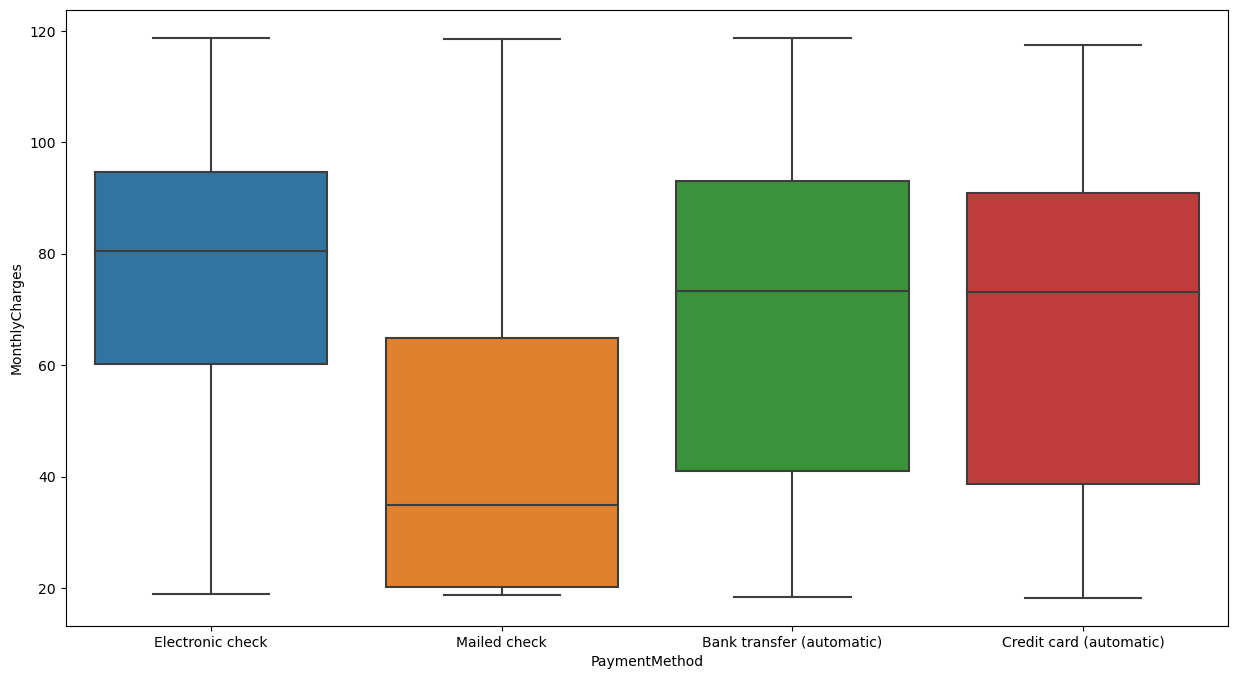

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="PaymentMethod", y="MonthlyCharges", data=df)
plt.show()

# CORRELATION ANALYSIS

In [ ]:
def correlation_matrix(df, cols):
    fig = plt.gcf()
    fig.set_size_inches(5, 5)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    fig = sns.heatmap(df[cols].corr(), annot=True, linewidths=0.5, annot_kws={'size': 12}, linecolor='w', cmap='RdBu')
    plt.show(block=True)

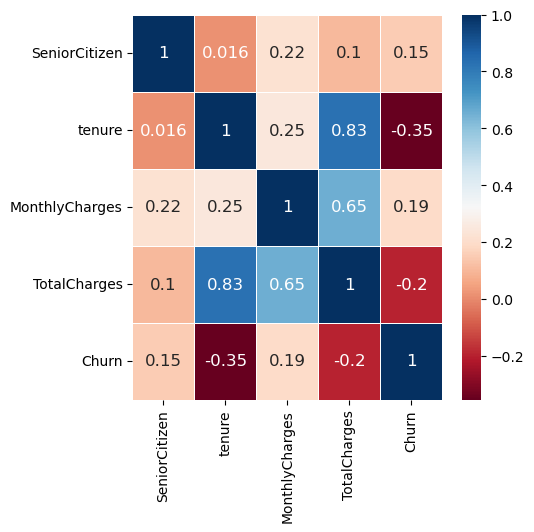

In [ ]:
correlation_matrix(df, df.columns)

# STATISTICAL ANALYSIS

- For supervised machine learning it is sufficient to understand all the unique entries in each column of the tabulated data. This will help in coming up with the appropriate EDA methodology for machine learning modeling. Robust statistical tests give comprehensive information about data.<br>


- Understanding the type of variables being used is important for selecting appropriate statistical methods and interpreting the results accurately.

This project utilized five important variables from the target data to perform correlation analysis.

- **Categorical variables:** Represent qualitative data divided into categories or groups.
- **Numerical variables:** Represent quantitative data and can take on numerical values.
- **Ordinal variables:** Categorical variables with an ordered or ranked structure.
- **Dichotomous variables:** Categorical variables with only two distinct values.
- **Polytomous variables:** Categorical variables with more than two distinct categories.

**NB: Before performing any statistical test consider either using parametric or non-parametric test.**

Each of the above variables will be used to generate data insights by testing them the appropriate statistical test.

## Univariate Statistical Analysis
* **Normality and Variance test**


It is impotant to note that parametric tests are more robust compared to non parametric tests. Hence we need to asses the data if the parametric assumptions are not violeted.


Normality tests are used to determine if a dataset is normally distributed and to check how likely it is for a random variable in the dataset to be normally distributed.


There are three numerical features in this dataset - **MonthlyCharges**, **Tenure**, and **TotalCharges**.


Hypotheses -

* H0: the sample has a Gaussian distribution.
* H1: the sample does not have a Gaussian distribution.

We can not perform **Shapiro-Wilk Test** because sample size > 5000 and for this test p-value may not be accurate for N > 5000.

Hence we use **Anderson-Darling** for normality test.

* **Anderson-Darling Test**

`Critical values` in a statistical test are a range of pre-defined significance boundaries at which the H0 can be failed to be rejected if the calculated statistic is less than the critical value.

Rather than just a single p-value, this test returns a critical value for a **range of different commonly used significance levels**.

In this case  - **normal/exponential** (15%, 10%, 5%, 2.5%, 1%)

In [ ]:
from scipy import stats

# Perform Anderson-Darling test for each variable
variables = ['tenure', 'MonthlyCharges', 'TotalCharges']
for variable in variables:
    sample_data = df[variable]
    result = stats.anderson(sample_data, dist='norm')
    print(f"Variable: {variable}")
    print(f"Statistic: {result.statistic}")
    print(f"Critical Values: {result.critical_values}")
    print(f"Significance Levels: {result.significance_level}")
    print(f"Is Normal: {result.statistic < result.critical_values[2]}")
    print("=======================================")

Variable: tenure
Statistic: 202.31780895668817
Critical Values: [0.576 0.656 0.787 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]
Is Normal: False
Variable: MonthlyCharges
Statistic: 170.18974892396363
Critical Values: [0.576 0.656 0.787 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]
Is Normal: False
Variable: TotalCharges
Statistic: 345.2272642190619
Critical Values: [0.576 0.656 0.787 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]
Is Normal: False


* **Levene test for homoscedasticity**

The test compares the variances of the different groups (in this case, the variables) and provides a test statistic and a p-value. If the p-value is less than the chosen significance level (alpha), we reject the null hypothesis of homoscedasticity, indicating that the variances are significantly different. Conversely, if the p-value is greater than alpha, we fail to reject the null hypothesis, indicating that the variances are not significantly different, suggesting homoscedasticity.


Hypotheses -

* H0: Variances are significantly different.
    
* H1: Variances are not significantly different.

In [ ]:
from scipy.stats import levene

# Extract the variables into separate Series or arrays
tenure = df['tenure']
monthly_charges = df['MonthlyCharges']
total_charges = df['TotalCharges']

# Perform Levene's test
statistic, p_value = levene(tenure, monthly_charges, total_charges)

# Output the test results
print("Levene's Test")
print("-------------")
print(f"Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("The variances are significantly different. Reject the null hypothesis of homoscedasticity.")
else:
    print("The variances are not significantly different. Fail to reject the null hypothesis of homoscedasticity.")


Levene's Test
-------------
Test Statistic: 7800.044615500039
P-value: 0.0
The variances are significantly different. Reject the null hypothesis of homoscedasticity.


* **Conclusion:** We can conclude that 'tenure', 'MonthlyCharges' and 'TotalCharges' cannot be tested by parametric methods.

## Bivariate statistical analysis

#### Numerical to Numerical relationships

We need to choose between **Pearson correlation** and **Spearman correlation**. For Pearson r correlation, both variables should be normally distributed
According to the normality test tenure, MonthlyCharges and TotalCharges columns are **not normally distributed** 

**Unlike the Pearson correlation**, the Spearman correlation does not assume that both datasets are **normally distributed**

Pearson correlation assumes normality, linearity and homoscedasticity. Pearson's correlation is also unable to tell the difference between dependent and independent variables

Hypotheses -


* **H0: there is a monotonic relationship between the samples**

* **H1: the two samples do not have monotonic relationship**

In [ ]:
def cal_spearmanr(c1, c2):

    alpha = 0.05

    correlation, p_value = stats.spearmanr(df[c1], df[c2])

    print(f'{c1}, {c2} correlation : {correlation}, p : {p_value}')

    if p_value > alpha:
        print(' reject Null hypothesis')
    else:
        print('Accept Null hypothesis')

In [ ]:
cal_spearmanr('tenure','MonthlyCharges')
print('===============================')
cal_spearmanr('tenure','TotalCharges')
print('===============================')
cal_spearmanr('MonthlyCharges','TotalCharges')

tenure, MonthlyCharges correlation : 0.2753387429197595, p : 1.535767470847339e-122
Accept Null hypothesis
tenure, TotalCharges correlation : 0.8891770805365491, p : 0.0
Accept Null hypothesis
MonthlyCharges, TotalCharges correlation : 0.6380321757758154, p : 0.0
Accept Null hypothesis


#### Numerical to Categorical i.e,. target variable (Dichotomous)

* **Mann-Whitney U Test**

The Mann-Whitney U test is a **nonparametric** statistical significance test for determining whether two independent samples were drawn from a population with the same distribution.

The test determines whether the medians of two or more groups are different.

**NB** : For the test to be effective, it requires **at least 20 observations** in each data sample.

* Fail to Reject H0: Sample distributions are equal. (or sample distributions are likely drawn from the same population)
* Reject H0: Sample distributions are not equal.

Hypothesis:

* **H0: population medians are equal**
* **H1: population medians are not equal**

In [ ]:
def mannwhitneyu_correlation(feature1):
    stat, p_value = stats.mannwhitneyu(df[feature1], (df['Churn'] == 'Yes').astype(int))
    print(f"Correlation between {feature1} and Churn")
    print('Statistics = %.5f, p = %.5f' % (stat, p_value))

    # interpret the significance
    alpha = 0.05
    if p_value > alpha:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')
    print('----\n') 

In [ ]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for num in numerical_features:
    print(f"Correlation with {num}")
    mannwhitneyu_correlation(num)


Correlation with tenure
Correlation between tenure and Churn
Statistics = 49449024.00000, p = 0.00000
Different distribution (reject H0)
----

Correlation with MonthlyCharges
Correlation between MonthlyCharges and Churn
Statistics = 49449024.00000, p = 0.00000
Different distribution (reject H0)
----

Correlation with TotalCharges
Correlation between TotalCharges and Churn
Statistics = 49449024.00000, p = 0.00000
Different distribution (reject H0)
----



## Multivariate statistical analysis

* Kruskal-Wallis test is non-parametric alternative to ANOVA: It is used to compare the distributions of three or more independent groups. It is suitable when the assumptions of ANOVA (normality and equal variances) are violated. The test is based on ranks rather than the actual data values.


Let us perform the Kruskal-Wallis test on the variables 'tenure', 'MonthlyCharges', and 'TotalCharges' to check if they are independent from one another

In [ ]:
from scipy.stats import kruskal

# Extract the variables into separate Series or arrays
tenure = df['tenure']
monthly_charges = df['MonthlyCharges']
total_charges = df['TotalCharges']

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(tenure, monthly_charges, total_charges)

# Output the test results
print("Kruskal-Wallis Test")
print("-------------------")
print(f"Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("There is a significant difference in at least one of the variables.")
else:
    print("There is no significant difference in the variables.")


Kruskal-Wallis Test
-------------------
Test Statistic: 13236.502813218167
P-value: 0.0
There is a significant difference in at least one of the variables.


* **Conclusion:** We can conclude that 'tenure', 'MonthlyCharges' and 'TotalCharges' are independent variables.

## Bivaariate Analysis

* When testing for interaction between two categorical variables in one column, a common statistical test is the **chi-square test of independence**. This test evaluates whether there is a relationship between the two categorical variables and determines if this relationship is statistically significant.

* **Cramer's V** statistic is a measure of association used to assess the strength and significance of the relationship between two categorical variables. Cramer's V takes into account the dimensions of the contingency table, the number of observations, and the chi-square statistic obtained from the chi-square test. The interpretation of Cramer's V statistic is similar to that of correlation coefficients. **A value close to 0 indicates no association, while a value close to 1 suggests a strong association between the variables**. 

### Chi-Square

Detect independence between 2 categorical variables, 2x2 or 2xMany

Test statistic in the context of the chi-squared distribution with the requisite number of degrees of freedom

* If Statistic >= Critical Value: significant result, reject null hypothesis (H0), dependent.
* If Statistic < Critical Value: not significant result, fail to reject null hypothesis (H0), independent.

In terms of a p-value and a chosen significance level (alpha):

* If p-value <= alpha: significant result, reject null hypothesis (H0), dependent.
* If p-value > alpha: not significant result, fail to reject null hypothesis (H0), independent

In [ ]:
def calculate_chi_square(feature1, feature2='Churn'):
    print(f"Correlation between **{feature1}** and **{feature2}**")
    crosstab = pd.crosstab(df[feature1], df[feature2])
    # display(crosstab)
    stat, p, dof, expected = stats.chi2_contingency(crosstab, correction=True)

    print(f'p-value : {p}, degree of freedom: {dof}')
    # print("expected frequencies :\n", expected)

    # interpret test-statistic
    prob = 0.95
    critical = stats.chi2.ppf(prob, dof)
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

    if abs(stat) >= critical:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')

    # interpret p-value
    alpha = 1.0 - prob

    print('significance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
    print('-----------------------------------\n')


In [ ]:
print("**Chi-Square Correlation Between Dichotomous Features with Target : Churn**")

dichotomous_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

for col in dichotomous_cols:
    if col in df.columns:
        calculate_chi_square(col)
    else:
        print(f"Column '{col}' does not exist in the DataFrame.")

**Chi-Square Correlation Between Dichotomous Features with Target : Churn**
Correlation between **gender** and **Churn**
p-value : 0.4904884707065509, degree of freedom: 1
probability=0.950, critical=3.841, stat=0.475
Independent (fail to reject H0)
significance=0.050, p=0.490
Independent (fail to reject H0)
-----------------------------------

Correlation between **Partner** and **Churn**
p-value : 3.97379757451591e-36, degree of freedom: 1
probability=0.950, critical=3.841, stat=157.503
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------

Correlation between **Dependents** and **Churn**
p-value : 2.0196592017051303e-42, degree of freedom: 1
probability=0.950, critical=3.841, stat=186.322
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------

Correlation between **PhoneService** and **Churn**
p-value : 0.34992398942431924, degree of freedom: 1
probability=0.950, critical=3.841

**With 5% significance level 'PhoneService' and 'gender' features are not dependent with the target : Churn**

### Polytomous Features

In [ ]:
print("**Chi-Squre Correlation Between Polytomous Features with Target : Churn**")

polytomous_cols = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']

for col in polytomous_cols:
    if col in df.columns:
        calculate_chi_square(col)
    else:
        print(f"Column '{col}' does not exist in the DataFrame.")

**Chi-Squre Correlation Between Polytomous Features with Target : Churn**
Correlation between **MultipleLines** and **Churn**
p-value : 0.0035679273999811405, degree of freedom: 2
probability=0.950, critical=5.991, stat=11.272
Dependent (reject H0)
significance=0.050, p=0.004
Dependent (reject H0)
-----------------------------------

Correlation between **InternetService** and **Churn**
p-value : 5.831198962237274e-159, degree of freedom: 2
probability=0.950, critical=5.991, stat=728.696
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------

Correlation between **OnlineSecurity** and **Churn**
p-value : 1.4006867477839222e-184, degree of freedom: 2
probability=0.950, critical=5.991, stat=846.677
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------

Correlation between **OnlineBackup** and **Churn**
p-value : 7.776099238804965e-131, degree of freedom: 2
probability=0.950, critica

**With 5% significance level All polytomous features are dependent with the target : Churn**

## Multicollinearity

For categorical variables, multicollinearity can be detected with **Spearman rank correlation coefficient** (ordinal variables) and **chi-square** test (nominal variables).

**Chi-Square Test:**<br>
Perform a chi-square test of independence for each pair of categorical variables to assess the association between them. The chi-square test will determine if there is a significant relationship between the variables.


In [ ]:
calculate_chi_square('PaymentMethod','MultipleLines')


calculate_chi_square('PaymentMethod','PhoneService')


calculate_chi_square('PaymentMethod','Contract')

Correlation between **PaymentMethod** and **MultipleLines**
p-value : 1.216564211436556e-81, degree of freedom: 6
probability=0.950, critical=12.592, stat=392.377
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------

Correlation between **PaymentMethod** and **PhoneService**
p-value : 0.8536395500879111, degree of freedom: 3
probability=0.950, critical=7.815, stat=0.783
Independent (fail to reject H0)
significance=0.050, p=0.854
Independent (fail to reject H0)
-----------------------------------

Correlation between **PaymentMethod** and **Contract**
p-value : 6.908556640756664e-213, degree of freedom: 6
probability=0.950, critical=12.592, stat=1000.518
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



In [ ]:
#!pip install lux-api

In [ ]:
#!pip install darts

In [ ]:
#!pip install lux-widget

In [ ]:
#jupyter nbextension install --py luxwidget
#jupyter nbextension enable --py luxwidget

In [ ]:
#import lux

In [ ]:
#df = pd.read_csv('D:\MACHINE LEARNING PROJECT (GITHUB)\Machine-learning-end-to-end-project\customer_data.csv')

In [ ]:
#df

## Data Preprocessing & Feature Engineering

In [ ]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [ ]:
def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [ ]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [ ]:
for col in num_cols:
    print(col, check_outlier(df, col))
   

tenure False
MonthlyCharges False
TotalCharges False
Churn False
